In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


# Data Prep

In [2]:
DATADIR = "C:/Users/Omkar/ML and DS/Dog/dataset"

In [3]:
CATEGORIES = ["Golden", "German"]

In [4]:
img_size = 64 

### Creating Training Set

- new_array contains resized image 64x64x3
- training data contains X,y

In [5]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_array, class_num])
    

In [6]:
create_training_data()

In [7]:
print(len(training_data))

302


In [8]:
import random


In [9]:
random.shuffle(training_data)

### Seperation of X,y

- features = new_array
- label = class_num

In [10]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X.shape

(302, 64, 64, 3)

In [13]:
y.shape

(302,)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Reshaping y**

- train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
- test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [15]:
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

In [16]:
x_train.shape

(241, 64, 64, 3)

In [17]:
y_train.shape

(1, 241)

y= [1]


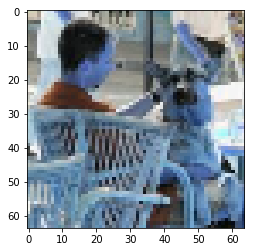

In [25]:
plt.imshow(x_train[5])
print("y= "+ str(y_train[:,5]))

y=[0]


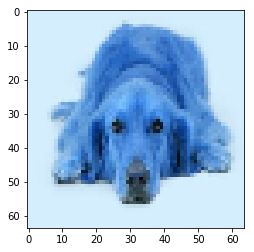

In [21]:
plt.imshow(x_train[12])
print("y="+str(y_train[:,12]))

In [26]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 241
Number of testing examples: m_test = 61
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (241, 64, 64, 3)
train_set_y shape: (1, 241)
test_set_x shape: (61, 64, 64, 3)
test_set_y shape: (1, 61)


**Reshaping training and test examples**

In [27]:
train_set_x_flatten = x_train.reshape(x_train.shape[0], -1).T
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 241)
train_set_y shape: (1, 241)
test_set_x_flatten shape: (12288, 61)
test_set_y shape: (1, 61)
sanity check after reshaping: [49 63 81 56 74]


Standardizing dataset

In [28]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [29]:
train_set_x.shape

(12288, 241)

# Simple Logistic Regression

**Helper function**

In [30]:
def sigmoid(z):
    
    s = 1/(1+np.exp(-z))
    
    return s

In [31]:

def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [32]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # Forward Propagation
    A = sigmoid(np.dot(w.T,X)+b)                        # compute activation
    cost = (-1 / m) * np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))   # compute cost
    
    # Backward propagation
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost

### Optimization

In [33]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
   
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [34]:
def predict(w, b, X):
   
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)

    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0,i] = 1 if A[0,i]>0.5 else 0

    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Model

In [35]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [36]:
d = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.435661
Cost after iteration 200: 0.291142
Cost after iteration 300: 0.244894
Cost after iteration 400: 0.212746
Cost after iteration 500: 0.188174
Cost after iteration 600: 0.168657
Cost after iteration 700: 0.152724
Cost after iteration 800: 0.139448
Cost after iteration 900: 0.128204
Cost after iteration 1000: 0.118558
Cost after iteration 1100: 0.110193
Cost after iteration 1200: 0.102871
Cost after iteration 1300: 0.096412
Cost after iteration 1400: 0.090675
Cost after iteration 1500: 0.085548
Cost after iteration 1600: 0.080941
Cost after iteration 1700: 0.076780
Cost after iteration 1800: 0.073005
Cost after iteration 1900: 0.069567
train accuracy: 100.0 %
test accuracy: 73.77049180327869 %


**Incorrect prediction**


y = 1  predicted = 0.0


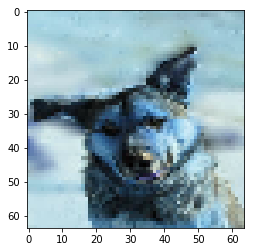

In [37]:
index = 45
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[0,index]) + "  predicted = " + str(d["Y_prediction_test"][0,index]))

Plotting cost function and gradient

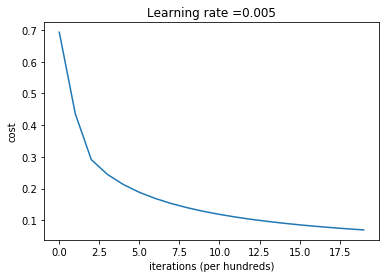

In [38]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

# Shallow NN

## Neural Network model

Logistic regression did not work well. You are going to train a Neural Network with a single hidden layer.

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### Defining the neural network structure ####
    
 - n_x: the size of the input layer
 - n_h: the size of the hidden layer (set this to 4) 
 - n_y: the size of the output layer

In [57]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [58]:
(n_x, n_h, n_y) = layer_sizes(train_set_x,y_train)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 12288
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


In [59]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) 
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros(shape=(n_y,1))
        
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [60]:
n_x, n_h, n_y = 3,4,1
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267 -0.02136196]
 [ 0.01640271 -0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288 -0.01057952]
 [-0.00909008  0.00551454  0.02292208]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00041539 -0.01117925  0.00539058 -0.0059616 ]]
b2 = [[0.]]


### Loop

In [61]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1,X)+b1
    #A1 = np.tanh(Z1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [62]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] # number of example

    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y) 
    cost = - (1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost)) 
    
    assert(isinstance(cost, float))
    
    return cost

In [63]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2,axis=1,keepdims=True)
#    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dZ1 = A1 - Y
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [66]:
def update_parameters(parameters, grads, learning_rate = 0.002):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

## Shallow NN model

In [67]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
   
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X,parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [68]:
def predict_nn(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [69]:
params = nn_model(train_set_x, y_train, n_h=4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.692987
Cost after iteration 1000: 0.002267
Cost after iteration 2000: 0.000961
Cost after iteration 3000: 0.000610
Cost after iteration 4000: 0.000446
Cost after iteration 5000: 0.000352
Cost after iteration 6000: 0.000291
Cost after iteration 7000: 0.000248
Cost after iteration 8000: 0.000216
Cost after iteration 9000: 0.000191


In [72]:
predictions = predict_nn(params, train_set_x)
print ('Accuracy: %d' % float((np.dot(y_train,predictions.T) + np.dot(1-y_train,1-predictions.T))/float(y_train.size)*100) + '%')

Accuracy: 100%


In [73]:
predictions_1 = predict_nn(params, test_set_x)
print ('Test Accuracy: %d' % float((np.dot(y_test,predictions_1.T) + np.dot(1-y_test,1-predictions_1.T))/float(y_test.size)*100) + '%')

Test Accuracy: 78%
